<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/03_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.5 MB/s eta 0:00:00


# K-최근접 이웃 알고리즘

*   분류, 회귀 모델 모두 재공
*   훈련데이터셋에서 가장 가까운 데이터포인트 찾기 -> 유유상종,끼리끼리



## forge 데이터셋 분류

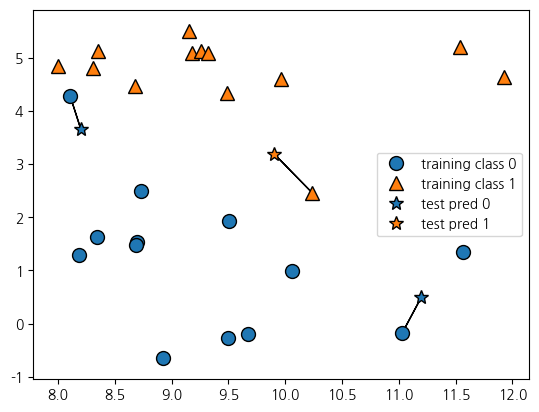

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.figure(dpi=100)
mglearn.plots.plot_knn_classification(n_neighbors=1)

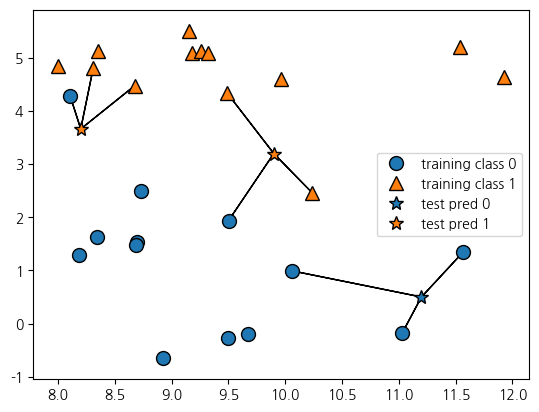

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.figure(dpi=100)
mglearn.plots.plot_knn_classification(n_neighbors=3)

## forge 데이터셋을 활용한 이진분류 문제 정의

### 데이터 준비하기

In [ ]:
X,y = mglearn.datasets.make_forge() # X: 데이터(독립변수, 특성, 문제집), y: 레이블(종속변수, 타겟, 정답)

### 일반화 성능을 평가 할 수 있도록 데이터분리 -> 훈련셋, 테스트셋

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7)

In [ ]:
X_train.shape

(19, 2)

In [ ]:
X_test.shape

(7, 2)

### K-최근접이웃 분류모델 설정

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

### 모델 학습하기

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가하기

In [ ]:
knn.score(X_test, y_test)

0.8571428571428571

In [ ]:
knn.score(X_train, y_train)

0.9473684210526315

## KNeighborsClassifier 이웃의 수에 따른 성능평가

1.   이웃의 수를 1~10까지 증가시켜 학습 진행
2.   score() 메서드를 이용하여 예측 정확도 저장 (train, test 각각 저장)
3.   차트를 활용하여 최적점 찾기



<function matplotlib.pyplot.show(close=None, block=None)>

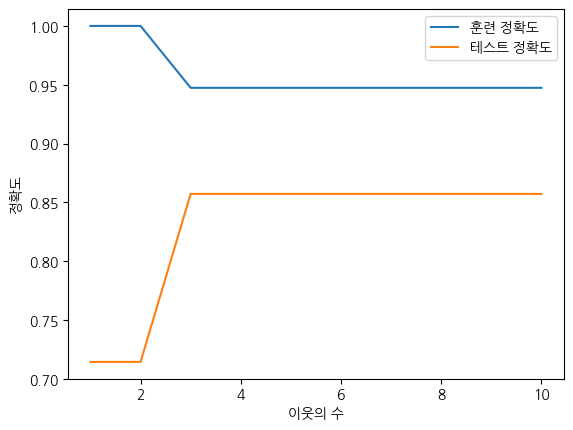

In [ ]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# 이웃의 수 변수
n_neighbors_settings = range(1,11)

# 1~10까지 n_neighbors의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings:
  #모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  #훈련 데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  #테스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

#예측 정확도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label='훈련 정확도')
plt.plot(n_neighbors_settings, test_scores, label='테스트 정확도')
plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show


## 유방암 데이터셋을 활용한 이웃의 수 (결정경계)에 따른 성능평가

### 데이터 준비하기

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.data.shape

(569, 30)

### 데이터 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=7) # 75:25

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

### 1~20의 이웃의 수에 따른 성능평가

<function matplotlib.pyplot.show(close=None, block=None)>

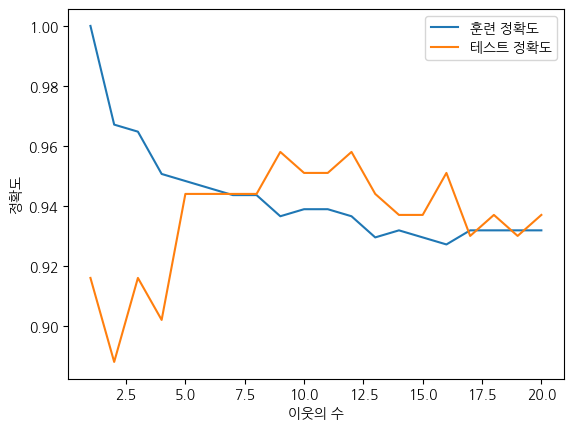

In [ ]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# 이웃의 수 변수
n_neighbors_settings = range(1,21)

# 1~10까지 n_neighbors의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings:
  #모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  #훈련 데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  #테스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

#예측 정확도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label='훈련 정확도')
plt.plot(n_neighbors_settings, test_scores, label='테스트 정확도')
plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show

In [ ]:
max(test_scores)

0.958041958041958